In [217]:
#import libraries
%matplotlib inline
import tmdbsimple as tmdb
from imdb import IMDb
import time
import matplotlib
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML

from PIL import Image
from pylab import *

In [2]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
tmdb.API_KEY = '455e4535405115285f107dc76734be7e'

In [3]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='The Matrix')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg'

In [150]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='Avatar')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
avatar_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
avatar_poster

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg'

In [333]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='Logan')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
logan_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
logan_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/45Y1G5FEgttPAwjTYic6czC9xCn.jpg'

In [334]:
import urllib
urllib.urlretrieve(str(matrix_poster), "photos/matrix.jpg")
urllib.urlretrieve(str(avatar_poster), "photos/avatar.jpg")
urllib.urlretrieve(str(logan_poster), "photos/logan.jpg")

('photos/logan.jpg', <httplib.HTTPMessage instance at 0x119a86128>)

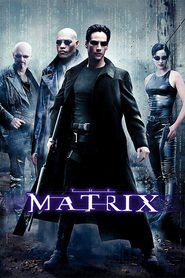

In [335]:
Image.open('photos/matrix.jpg')

In [234]:
import os

def get_imlist(path):
  """  Returns a list of filenames for
    all jpg images in a directory. """

  return [os.path.join(path,f) for f in os.listdir(path) if (f.endswith('.png') or f.endswith('.jpg'))]

get_imlist("photos")

['photos/avatar.jpg',
 'photos/avatar.png',
 'photos/local-filename.jpg',
 'photos/local-filename.png',
 'photos/matrix.jpg',
 'photos/matrix.png']

In [336]:
for path in get_imlist("photos"):
    pil_im = Image.open(path)
    pil_im = pil_im.convert("LA")
    pil_im.thumbnail((300,300))
    pil_im.save(path[:-3]+"png")


In [337]:
one = Image.open('photos/matrix.png')
two = Image.open('photos/avatar.png')
three = Image.open("photos/logan.png")

one_flat = scale(np.array(one).T[0].flatten())
two_flat = scale(np.array(two).T[0].flatten())
three_flat = scale(np.array(three).T[0].flatten())
images = np.stack((one_flat, two_flat, three_flat))

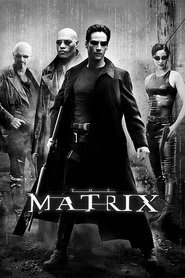

In [232]:
one

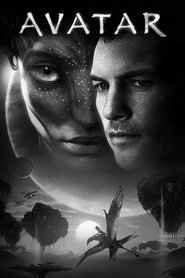

In [233]:
two

In [235]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

** Anything below this could be incorrect to be honest. I'm not sure where I went wrong in the PCA. **

In [338]:
pca = PCA(n_components=len(np.array(images).T))
pca.fit(np.array(images).T)
var = pca.explained_variance_ratio_
var

ValueError: n_components=51430 must be between 0 and n_features=3 with svd_solver='full'

In [344]:
pca = PCA()
pca.fit(images)
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var1

array([  59.5,  100. ,  100. ])

In [346]:
X = scale(images)

pca = PCA(n_components=44)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([  62.86,  100.  ,  100.  ])

In [262]:
np.array(images).T

array([[ 0.70892651, -1.06239163],
       [ 0.75225576, -1.06239163],
       [ 0.6367111 , -1.06239163],
       ..., 
       [-1.0098004 , -0.88770454],
       [-0.98091423, -0.90517325],
       [-0.77871107, -0.90517325]])

In [263]:
np.array(images)

array([[ 0.70892651,  0.75225576,  0.6367111 , ..., -1.0098004 ,
        -0.98091423, -0.77871107],
       [-1.06239163, -1.06239163, -1.06239163, ..., -0.88770454,
        -0.90517325, -0.90517325]])

In [227]:
np.array(one).T[0].flatten()

array([120, 123, 115, ...,   1,   3,  17], dtype=uint8)

In [265]:
len(np.array(images).T)

51430

In [266]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [273]:
images.shape

(2, 51430)

In [274]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X.shape

(6, 2)

In [277]:
images

array([[ 0.70892651, -1.06239163],
       [ 0.75225576, -1.06239163],
       [ 0.6367111 , -1.06239163],
       ..., 
       [-1.0098004 , -0.88770454],
       [-0.98091423, -0.90517325],
       [-0.77871107, -0.90517325]])

In [276]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [315]:
test = scale(np.array(one).T[0].flatten()).T.reshape(-1,1)
pca1 = PCA()
pca1.fit(test)
var= pca1.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

var

array([ 1.])

In [308]:
scale(np.array(one).T[0].flatten()).shape

(51430,)

In [331]:
X = np.array([[-1, -1, 1], [-2, -1, 1], [-1, -1, 1] ]) #[1,1, 1], [2,1, 1], [1,3, 2]])
pca1 = PCA(n_components = 3)
pca1.fit(X)
var= pca1.explained_variance_ratio_

In [332]:
np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

array([ 100.,  100.,  100.])

In [325]:
images.shape

(2, 51430)

In [326]:
X.shape

(2, 3)

In [322]:
images

array([[ 1.41785303,  1.50451153,  1.27342219, ..., -2.0196008 ,
        -1.96182847, -1.55742213],
       [-2.12478325, -2.12478325, -2.12478325, ..., -1.77540908,
        -1.8103465 , -1.8103465 ]])

In [343]:
images.T

array([[ 0.70892651, -1.06239163, -0.84683033],
       [ 0.75225576, -1.06239163, -0.84683033],
       [ 0.6367111 , -1.06239163, -0.82630044],
       ..., 
       [-1.0098004 , -0.88770454, -0.80577056],
       [-0.98091423, -0.90517325, -0.78524068],
       [-0.77871107, -0.90517325, -0.78524068]])